In [1]:
#Load all libraries needing to use
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
#Create empty list for data and labels
data = []
labels = []
classes = 43
current_path = os.getcwd()

In [3]:
#Declare the path for dataset
current_path = "C:\\Users\\Khoi Tran\\TrafficSigns"

In [4]:
#Check the ability of loading images
#Preprocess the images and labels
for c in range(classes):
    path = os.path.join(current_path,'train',str(c))
    images = os.listdir(path)

    for img in images:
        try:
            image = Image.open(path + '\\'+ img)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(c)
        except:
            print("Error loading")

#Convert empty lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [5]:
#Split training and testing dataset with 80% training using train_test_plit
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
#Handle labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43)


In [6]:
#Building the Sequential model
model = Sequential()
#Two layers of convolutions, one layers of Max Pooling and Dropout 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

#Two layers of convolutions, one layers of Max Pooling and Dropout
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

#Fully - connected 
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax')) 

In [7]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=65, 
                    validation_data=(X_test, y_test))

Epoch 1/65
981/981 [==============================] - 110s 110ms/step - loss: 1.6924 - accuracy: 0.5824 - val_loss: 0.3084 - val_accuracy: 0.9294
Epoch 2/65
981/981 [==============================] - 105s 107ms/step - loss: 0.4660 - accuracy: 0.8740 - val_loss: 0.1092 - val_accuracy: 0.9731
Epoch 3/65
981/981 [==============================] - 106s 108ms/step - loss: 0.2943 - accuracy: 0.9201 - val_loss: 0.2103 - val_accuracy: 0.9387
Epoch 4/65
981/981 [==============================] - 107s 109ms/step - loss: 0.2759 - accuracy: 0.9272 - val_loss: 0.0743 - val_accuracy: 0.9819
Epoch 5/65
981/981 [==============================] - 105s 107ms/step - loss: 0.2503 - accuracy: 0.9343 - val_loss: 0.0996 - val_accuracy: 0.9725
Epoch 6/65
981/981 [==============================] - 129s 132ms/step - loss: 0.2137 - accuracy: 0.9426 - val_loss: 0.0598 - val_accuracy: 0.9839
Epoch 7/65
981/981 [==============================] - 112s 115ms/step - loss: 0.2058 - accuracy: 0.9477 - val_loss: 0.0858 -

Epoch 57/65
981/981 [==============================] - 98s 100ms/step - loss: 0.3108 - accuracy: 0.9450 - val_loss: 0.0874 - val_accuracy: 0.9815
Epoch 58/65
981/981 [==============================] - 98s 100ms/step - loss: 0.3487 - accuracy: 0.9418 - val_loss: 0.0471 - val_accuracy: 0.9904
Epoch 59/65
981/981 [==============================] - 98s 100ms/step - loss: 0.3436 - accuracy: 0.9375 - val_loss: 0.0494 - val_accuracy: 0.9901
Epoch 60/65
981/981 [==============================] - 99s 101ms/step - loss: 0.2997 - accuracy: 0.9502 - val_loss: 0.0362 - val_accuracy: 0.9923
Epoch 61/65
981/981 [==============================] - 117s 119ms/step - loss: 0.2968 - accuracy: 0.9527 - val_loss: 0.0600 - val_accuracy: 0.9851
Epoch 62/65
981/981 [==============================] - 102s 104ms/step - loss: 0.3028 - accuracy: 0.9487 - val_loss: 0.0444 - val_accuracy: 0.9883
Epoch 63/65
981/981 [==============================] - 101s 103ms/step - loss: 0.2928 - accuracy: 0.9502 - val_loss: 0.050

In [9]:
#Save the model
model.save("my_model65.h5")

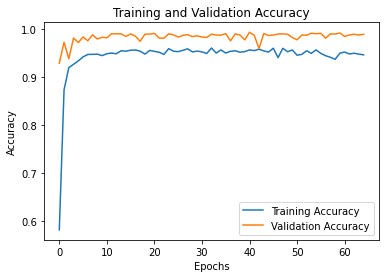

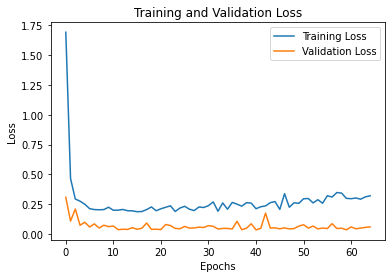

In [10]:
#plot graphs for accuracy and loss with an aim to compare between values and validation for that values
#Accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Loss
plt.figure(1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
#Use the model to evaluate test data
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test Loss: ', score[0]) 
print('Test Accuracy: ', score[1]) 

Test Loss:  0.06015552952885628
Test Accuracy:  0.9895434975624084
